# Prepare Environment

In [1]:
import numpy as np
import math, copy
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 18}
matplotlib.rc('font', **font)

np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

# Recap

## Vector-Vector element-wise operation
Most of the NumPy arithmetic, logical and comparison operations apply to vectors as well. These operators work on an element-by-element basis. For example 
$$ \mathbf{a} + \mathbf{b} = \sum_{i=0}^{n-1} a_i + b_i $$

In [2]:
a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Binary operators work element wise: [0 0 6 8]


## Vector-Vector dot-product

The dot product multiplies the values in two vectors element-wise and then sums the result. Vector dot product requires the dimensions of the two vectors to be the same.

Let's implement our own version of the dot product below:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [3]:
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = () 


# Notation

Here is a summary of some of the notation you will encounter, updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X` |   
|  $\mathbf{y}$  | training example  targets                | `y` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |`dj_dw[j]`| 
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| the gradient or partial derivative of cost with respect to a parameter $b$| `dj_db`|


# Dataset

You will use the dataset for final exam score prediction below in this exercise. The dataset contains 10 examples with three features (quiz, lab and midterm) shown in a table below.

| **Quiz (25)** | **Lab (15)** | **Midterm (25)** | **Final (35)** |
|:--------:|:-------:|:-----------:|:---------:|
|   18.0   |   14.7  |     15.0    |    18.4   |
|    4.5   |   14.6  |     3.4     |    3.3    |
|    8.7   |   14.1  |     4.1     |    10.6   |
|    3.5   |   15.0  |     12.8    |    5.5    |
|   12.0   |   13.7  |     13.4    |    7.4    |
|   20.0   |   14.4  |     18.1    |    8.5    |
|    8.0   |   6.4   |     8.4     |    7.9    |
|    5.5   |   14.8  |     4.4     |    5.7    |
|    2.6   |   6.5   |     1.3     |    0.9    |
|    9.3   |   13.3  |     5.3     |    7.8    |

You will build a linear regression model using these values so you can then predict the final exam score for other students. For example, a student with quiz=17.4, lab=14.3, and midterm=10.9 scores.

In [4]:
X = np.array([
    [18.0,14.7,15.0],
    [4.5,14.6,3.4],
    [8.7,14.1,4.1],
    [3.5,15.0,12.8],
    [12.0,13.7,13.4],
    [20.0,14.4,18.1],
    [8.0,6.4,8.4],
    [5.5,14.8,4.4],
    [2.6,6.5,1.3],
    [9.3,13.3,5.3],
    [9.2,14.6,20.3],
    [17.4,14.3,10.9],
    [14.4,15.0,19.1],
    [5.4,13.2,1.9],
    [0.5,7.2,0.0],
    [6.3,12.5,1.6],
    [6.2,13.2,5.6],
    [18.4,14.9,17.5],
    [19.4,15.0,20.6],
    [22.7,14.1,15.9],
    [24.1,15.0,25.0],
    [8.6,12.8,11.6],
    [17.9,14.8,12.5],
    [13.8,15.0,8.4],
    [5.2,14.3,1.6]
])
y = np.array([
    18.4,3.3,10.6,5.5,7.4,8.5,7.9,5.7,0.9,7.8,14.4,11.2,15.1,2.0,1.8,4.6,5.9,
    16.6,17.7,26.0,33.3,5.3,20.1,9.4,0.9])

Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

In [5]:
X_features = ['Quiz','Lab','Midterm']
n = X.shape[1]

assert n == len(X_features)

In [6]:
# Display data is stored in numpy array/matrix
print(f"X Shape: {X.shape}, X Type:{type(X)})")
print(X[:10])
print(f"y Shape: {y.shape}, y Type:{type(y)})")
print(y[:10])

X Shape: (25, 3), X Type:<class 'numpy.ndarray'>)
[[18.  14.7 15. ]
 [ 4.5 14.6  3.4]
 [ 8.7 14.1  4.1]
 [ 3.5 15.  12.8]
 [12.  13.7 13.4]
 [20.  14.4 18.1]
 [ 8.   6.4  8.4]
 [ 5.5 14.8  4.4]
 [ 2.6  6.5  1.3]
 [ 9.3 13.3  5.3]]
y Shape: (25,), y Type:<class 'numpy.ndarray'>)
[18.4  3.3 10.6  5.5  7.4  8.5  7.9  5.7  0.9  7.8]


# Visualize Dataset

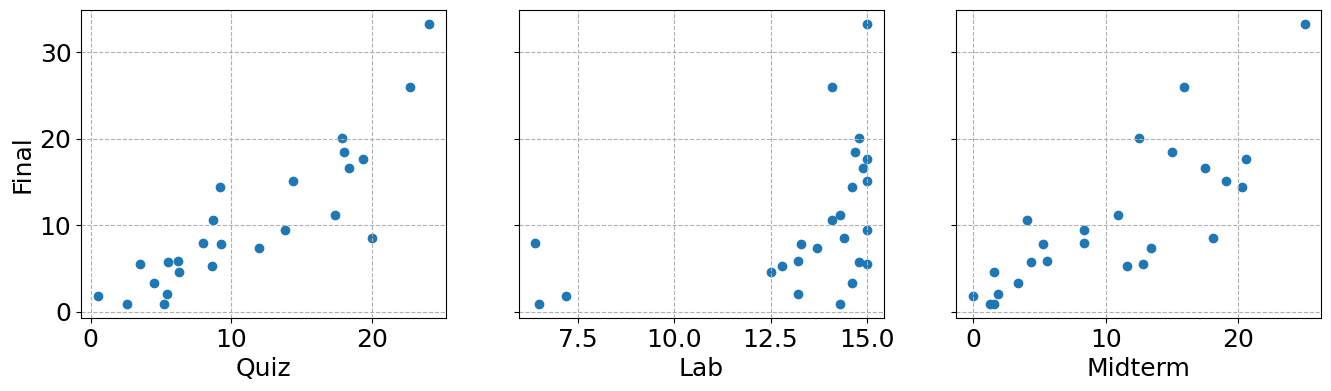

In [7]:
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].grid(linestyle='--')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Final")
plt.show()
plt.close('all')

# Model Parameters vector, w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, `n=3`.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.

For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [8]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453])
b_init = 785.1811367994083
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (3,), b_init type: <class 'float'>


# Model Prediction with Multiple Variables

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

## Single Prediction with For Loop (eq. (1))

In [9]:
def predict_single_loop(x, w, b): 
    """
    Single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):  model parameter
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    # TODO: Make a prediction using for-loop
    for i in range(n):
        p_i = w[i]*x[i] # YOUR CODE HERE
        p = p + p_i
    p = p + b
    return p

In [10]:
# Get a row from our dataset
x_vec = X[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

# Make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (3,), x_vec value: [18.  14.7 15. ]
f_wb shape: (), prediction: 267.5006860764082


## Single Prediction with Vector (eq. (2))

In [11]:
def predict(x, w, b): 
    """
    Single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    # TODO: Make a prediction using dot-product
    #p = (w@x) + b# YOUR CODE HERE
    p = np.dot(x, w) + b
    return p

In [12]:
# get a row from our training data
x_vec = X[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (3,), x_vec value: [18.  14.7 15. ]
f_wb shape: (), prediction: 267.5006860764082


The results and shapes are the same as the previous version which used looping. Going forward, `np.dot` will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.

# Compute Cost With Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [13]:
def compute_loss(X, y, w, b): 
    """
    Compute mean-squared-error (MSE) loss
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
      
    Returns:
      loss (scalar): loss
    """
    m = X.shape[0]
    loss = 0.0
    for i in range(m):
        f_wb_i = predict(X[i], w, b)           # (n,)(n,) = scalar (see np.dot)
        loss = loss + (f_wb_i - y[i])**2       # scalar
    loss = loss / (2 * m)                      # scalar
    return loss

In [14]:
# Compute and display cost using our pre-chosen optimal parameters.
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453])  # dummy weights
b_init = 785.1811367994083                                   # dummy bias
cost = compute_loss(X, y, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 180129.98747848094


# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## Compute Gradient

In [15]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        # Compute an error for each example i
        err = predict(X[i], w, b) - y[i]
        # For each weight j
        for j in range(n):
            # TODO: Compute the gradient for each weight j
            dj_dw[j] += err*X[i,j] # YOUR CODE HERE
        # TODO: Compute the gradient for bias b (there is only one bias)
        dj_db += err # YOUR CODE HERE
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [16]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 477.1047421251283
dj_dw at initial w,b: 
 [3460.61 6008.18 2356.1 ]


Expected output:
```
dj_db at initial w,b: 477.1047421251283
dj_dw at initial w,b: 
 [3460.61 6008.18 2356.1 ]
```

## Gradient Descent

In [17]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))         : Updated values of parameters 
      b (scalar)               : Updated value of parameter 
      J_history (ndarray (n,)) : History of losses
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # TODO: Calculate the gradient with `compute_gradient` function
        dj_db, dj_dw =compute_gradient(X, y, w, b) # YOUR CODE HERE

        # TODO: Update Parameters using w, b, alpha and gradient
        w = w-(alpha*dj_dw) # YOUR CODE HERE
        b = b-(alpha*dj_db) # YOUR CODE HERE
      
        # Save cost J at each iteration
        J_history.append(compute_loss(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history  # return final_w, final_b and J history

In [18]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# hyperparameter for training with gradient descent
alpha = 5.0e-7
iterations = 1000

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X.shape
for i in range(m):
    print(f"prediction: {predict(X[i], w_final, b_final):0.2f}, target value: {y[i]}")

Iteration    0: Cost    85.86   
Iteration  100: Cost    82.34   
Iteration  200: Cost    78.98   
Iteration  300: Cost    75.79   
Iteration  400: Cost    72.74   
Iteration  500: Cost    69.83   
Iteration  600: Cost    67.06   
Iteration  700: Cost    64.42   
Iteration  800: Cost    61.90   
Iteration  900: Cost    59.50   
b,w found by gradient descent: 0.00,[0.07 0.07 0.07] 
prediction: 3.30, target value: 18.4
prediction: 1.52, target value: 3.3
prediction: 1.84, target value: 10.6
prediction: 2.11, target value: 5.5
prediction: 2.69, target value: 7.4
prediction: 3.64, target value: 8.5
prediction: 1.58, target value: 7.9
prediction: 1.67, target value: 5.7
prediction: 0.71, target value: 0.9
prediction: 1.91, target value: 7.8
prediction: 3.01, target value: 14.4
prediction: 2.95, target value: 11.2
prediction: 3.34, target value: 15.1
prediction: 1.39, target value: 2.0
prediction: 0.51, target value: 1.8
prediction: 1.39, target value: 4.6
prediction: 1.70, target value: 5.9

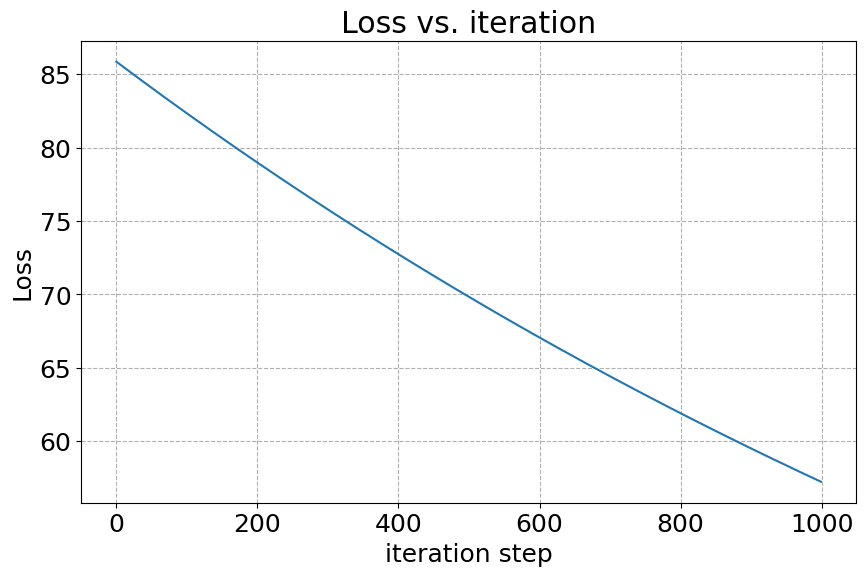

In [19]:
# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist)
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.show()
plt.close('all')

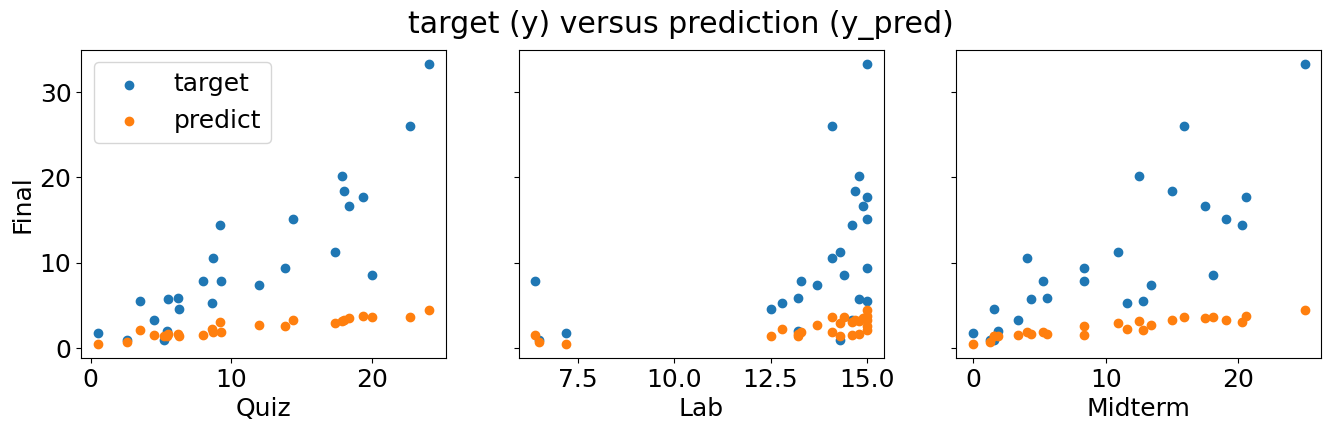

In [20]:
# Visualize prediction
m = X.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = predict(X[i], w_final, b_final)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) versus prediction (y_pred)")
plt.show()
plt.close('all')

# Exercise: Convergence?

* Q1: Did the training process above convergenced?
* Q2: Do you think the differences between the target and the predict are acceptable?

Please explain in the text cell below.

YOUR TEXT ANSWER

# Learning Rate

## $\alpha$ is 1.0e-7 (Slow Convergence)

Iteration    0: Cost    85.89   
Iteration  100: Cost    85.17   
Iteration  200: Cost    84.46   
Iteration  300: Cost    83.75   
Iteration  400: Cost    83.06   
Iteration  500: Cost    82.37   
Iteration  600: Cost    81.68   
Iteration  700: Cost    81.00   
Iteration  800: Cost    80.33   
Iteration  900: Cost    79.67   
b,w found by gradient descent: 0.00,[0.02 0.01 0.01] 


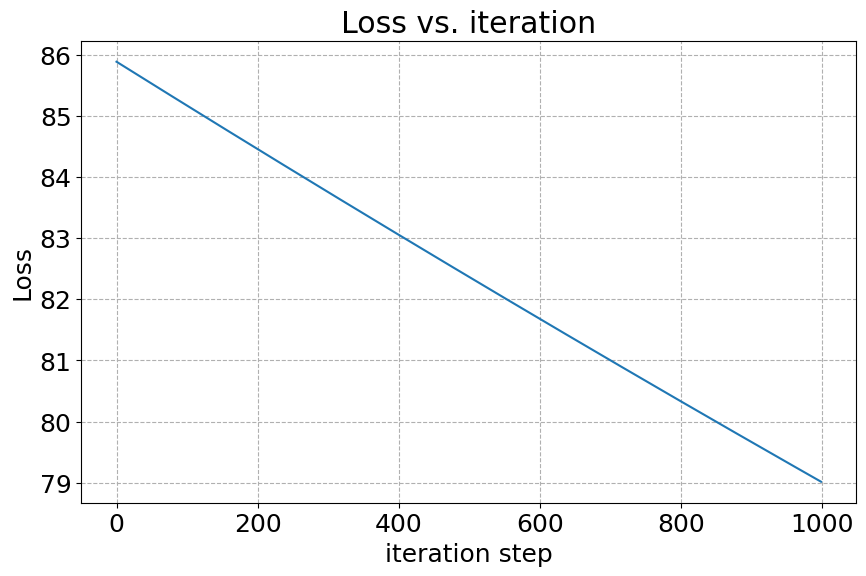

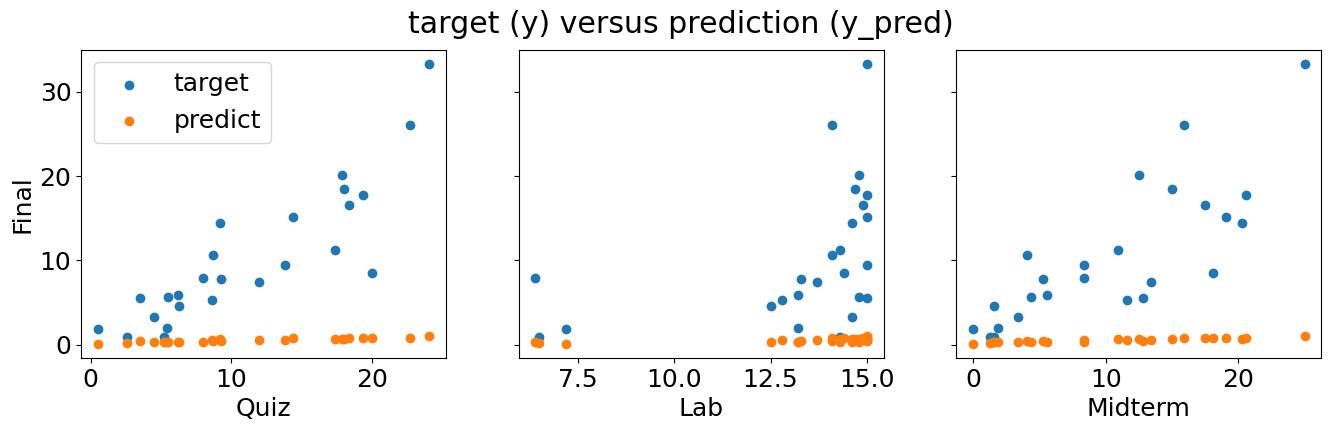

In [21]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# hyperparameter for training with gradient descent
alpha = 1.0e-7   # <--- *** alpha is here***
iterations = 1000

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist)
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.show()
plt.close('all')

# Visualize prediction
m = X.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = predict(X[i], w_final, b_final)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) versus prediction (y_pred)")
plt.show()
plt.close('all')

## $\alpha$ is 5.0e-3 (or 0.005) (Divergence)

Iteration    0: Cost   156.46   
Iteration  100: Cost 17574715881633379295248538140672.00   
Iteration  200: Cost 2109133606740426998478300725624923987326918179398490653720576.00   
Iteration  300: Cost 253116158522413886864236077547272809000432057274663006363117994828401373687539037286432768.00   
Iteration  400: Cost 30376354300360160464872088510860222878532149617610004389607822954247747378114874316251096171232096145395769879700701184.00   
Iteration  500: Cost 3645452372410683526523366489706501773712619586572595928314869591814975981632308951023867641276418277264900782032846795399419546514090042203677130752.00   
Iteration  600: Cost 437489070219237118289871556590132023628646510922916839358500220344328500388198767581494570700929288056196688788261291563447252220718855960920850199554932655679099573432855035904.00   
Iteration  700: Cost 5250286302183220174144231330934215109895130526204171612532547602484061576535992221156717153902432131450340107599909296756238221677056896463617731993949

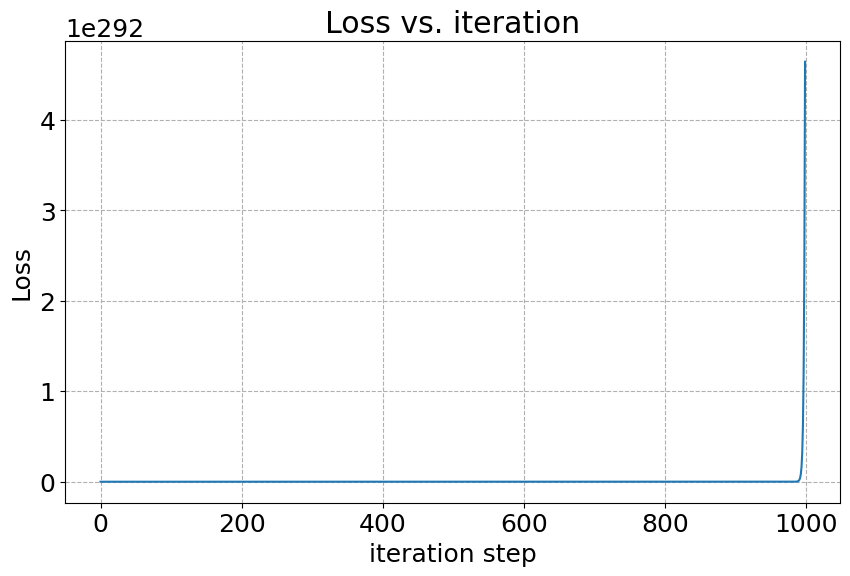

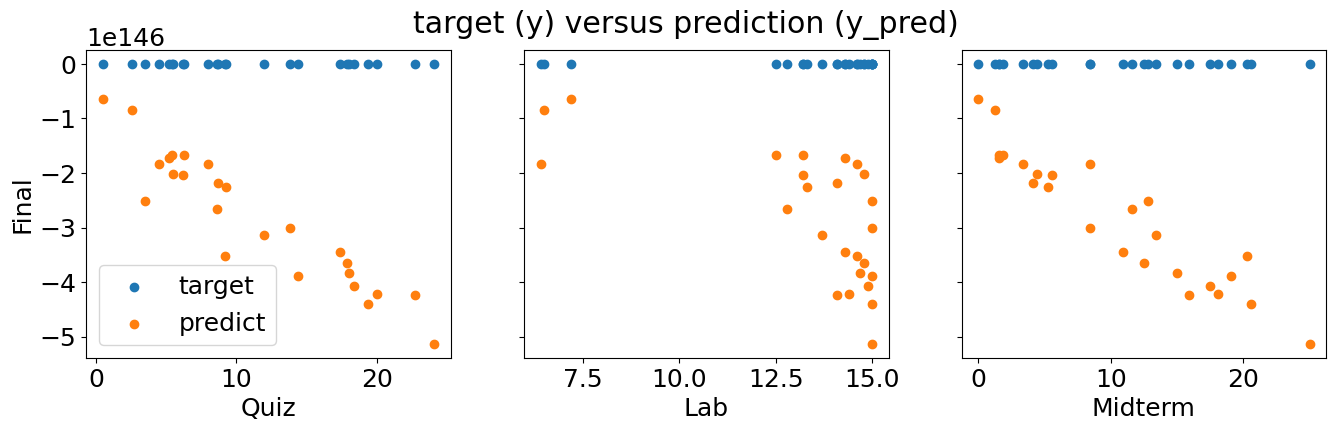

In [22]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# hyperparameter for training with gradient descent
alpha = 5.0e-3   # <--- *** alpha is here***
iterations = 1000

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist)
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.show()
plt.close('all')

# Visualize prediction
m = X.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = predict(X[i], w_final, b_final)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) versus prediction (y_pred)")
plt.show()
plt.close('all')

## Exercise: Try to find an appropriate $\alpha$

Iteration    0: Cost    85.87   
Iteration  100: Cost    83.74   
Iteration  200: Cost    81.67   
Iteration  300: Cost    79.66   
Iteration  400: Cost    77.70   
Iteration  500: Cost    75.80   
Iteration  600: Cost    73.95   
Iteration  700: Cost    72.16   
Iteration  800: Cost    70.41   
Iteration  900: Cost    68.72   
b,w found by gradient descent: 0.00,[0.05 0.04 0.04] 


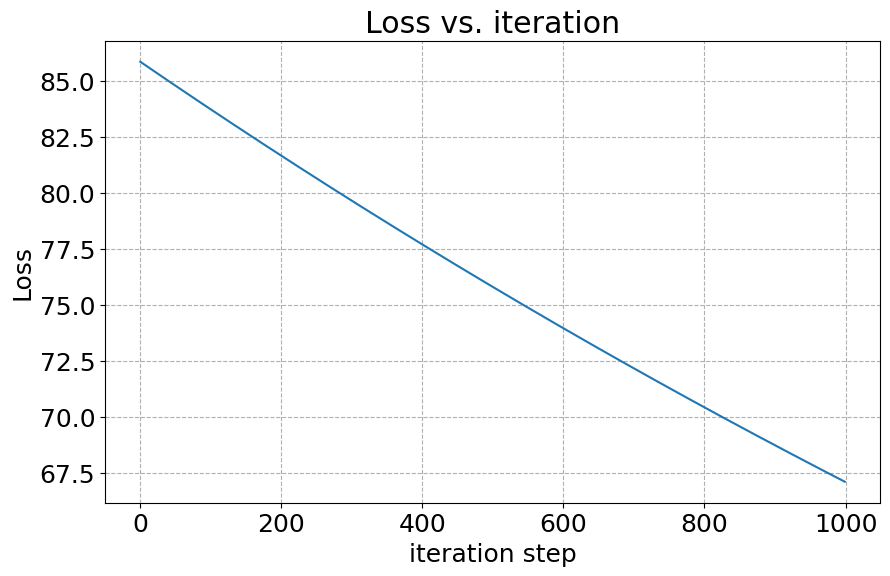

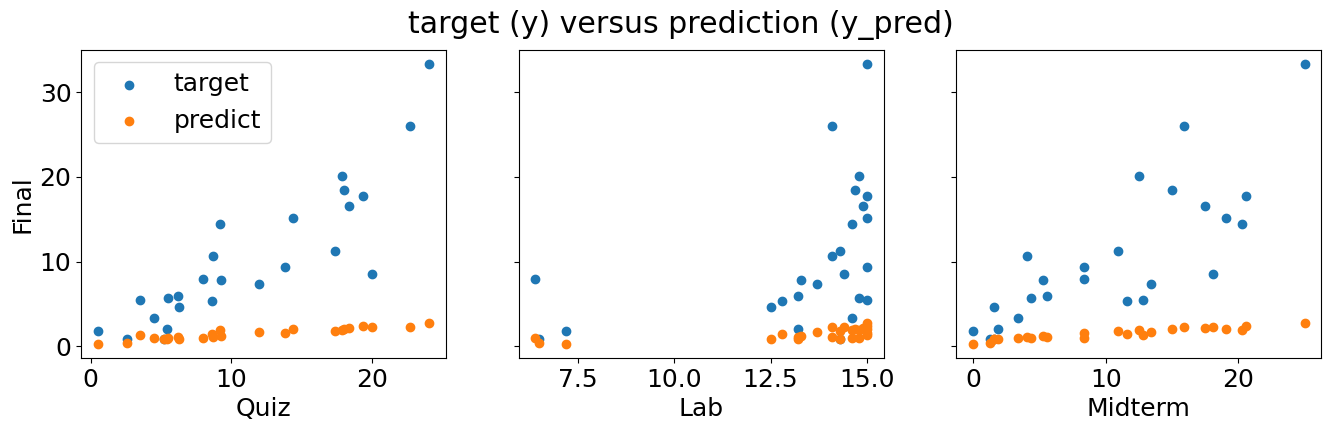

In [23]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# hyperparameter for training with gradient descent
# TODO: Set an appropriate learning rate
# Hint: Take a look at the previous two alpha values above
alpha = 3e-7 # YOUR CODE HERE
iterations = 1000

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist)
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.show()
plt.close('all')

# Visualize prediction
m = X.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = predict(X[i], w_final, b_final)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) versus prediction (y_pred)")
plt.show()
plt.close('all')

# Feature Scaling

There are three basic feature scaling techniques mentioned in this lecture.

* Max-Min Scaling: rescale each feature by both its minimum and maximum values using (x-min)/(max-min). It normalizes features to the range of -1 and 1.
* Mean normalization: $x_j = \dfrac{x_j - \mu_j}{max - min} $.
* Z-score normalization which we will explore below.

## z-score normalization

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{8}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{9}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{10}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new `x` value (living room area and number of bed-
rooms), we must first normalize `x` using the mean and standard deviation
that we had previously computed from the dataset.

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

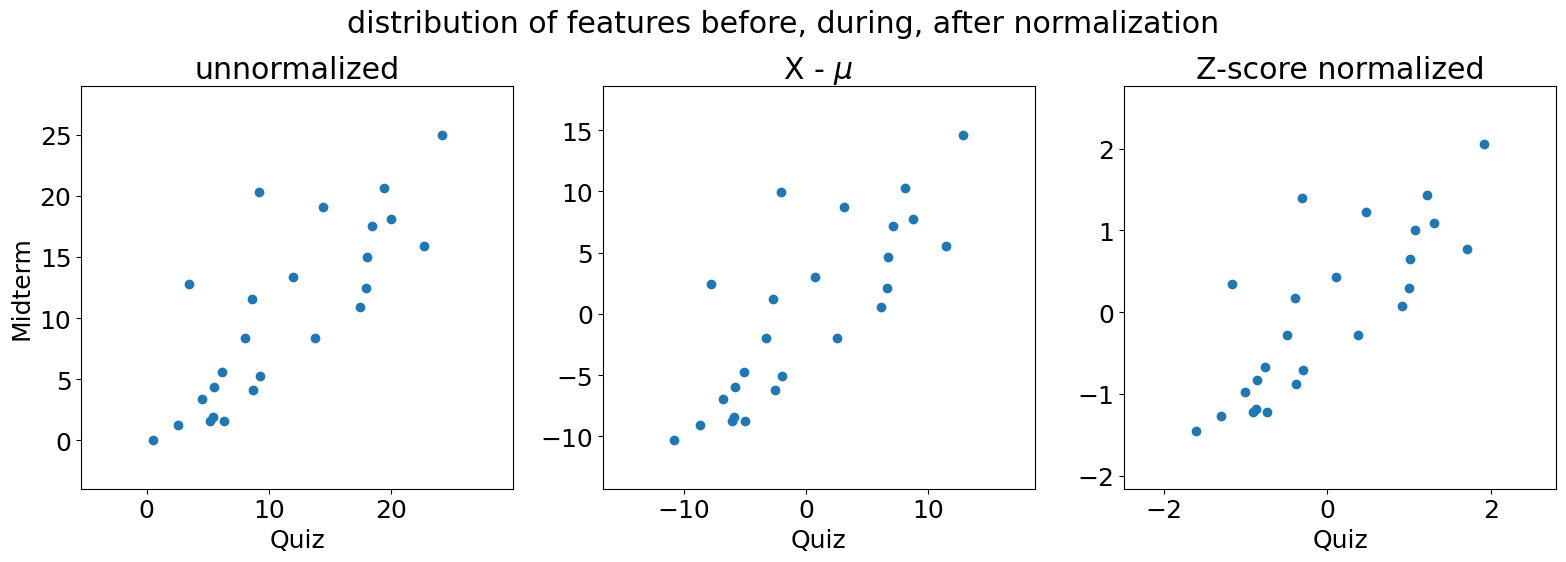

In [24]:
mu     = np.mean(X, axis=0)
sigma  = np.std(X, axis=0)
X_mean_ = (X - mu)
X_norm_ = (X - mu)/sigma

fea_idx = 2
fig,ax=plt.subplots(1, 3, figsize=(16, 6))
ax[0].scatter(X[:,0], X[:,fea_idx])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[fea_idx]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean_[:,0], X_mean_[:,fea_idx])
ax[1].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[fea_idx]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm_[:,0], X_norm_[:,fea_idx])
ax[2].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[fea_idx]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [25]:
def zscore_normalize_features(X):
    """
    computes X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

In [26]:
print('Before z-normalization')
print(f"Mean of each feature: {np.mean(X, axis=0)}")
print(f"Std. of each feature: {np.std(X, axis=0)}")
X_znorm, X_mu, X_sigma = zscore_normalize_features(X)
print('After z-normalization')
print(f"Mean of each feature: {np.mean(X_znorm, axis=0)}")
print(f"Std. of each feature: {np.std(X_znorm, axis=0)}")

Before z-normalization
Mean of each feature: [11.26 13.34 10.35]
Std. of each feature: [6.68 2.56 7.13]
After z-normalization
Mean of each feature: [ 9.33e-17 -7.64e-16  1.87e-16]
Std. of each feature: [1. 1. 1.]


Iteration    0: Cost    83.82   
Iteration  100: Cost    15.17   
Iteration  200: Cost     8.14   
Iteration  300: Cost     7.09   
Iteration  400: Cost     6.89   
Iteration  500: Cost     6.83   
Iteration  600: Cost     6.80   
Iteration  700: Cost     6.79   
Iteration  800: Cost     6.78   
Iteration  900: Cost     6.77   
b,w found by gradient descent: 10.41,[ 5.   -0.33  2.55] 


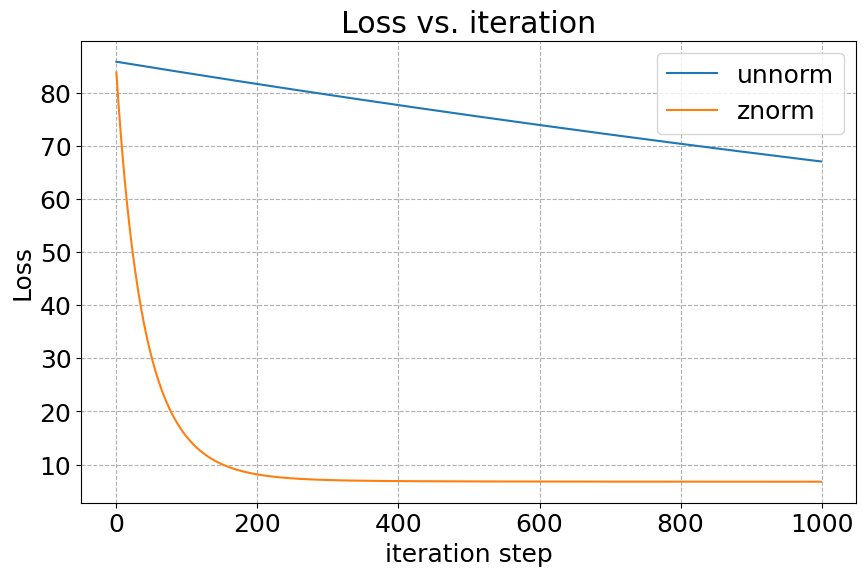

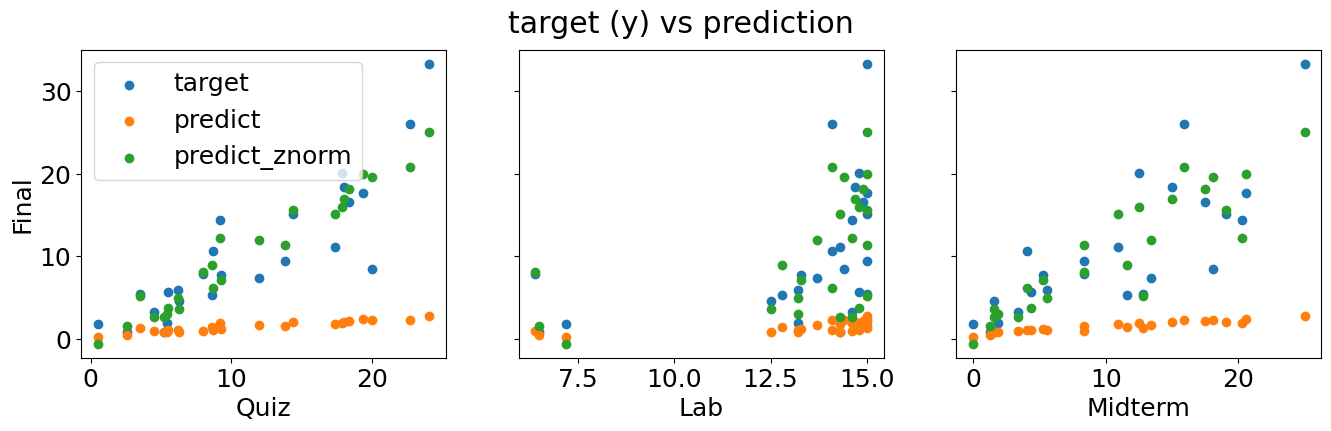

In [27]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# TODO: hyperparameter for training with gradient descent
# alpha = # YOUR CODE HERE
# iterations = # YOUR CODE HERE
alpha = 1.0e-2
iterations = 1000

# run gradient descent 
w_znorm, b_znorm, J_znorm = gradient_descent(X_znorm, y, initial_w, initial_b,
                                          alpha, iterations)
print(f"b,w found by gradient descent: {b_znorm:0.2f},{w_znorm} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist, label='unnorm')
ax.plot(J_znorm, label='znorm')
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.legend()
plt.show()
plt.close('all')

# Visualize prediction
m = X_znorm.shape[0]
y_pred_znorm = np.zeros(m)
for i in range(m):
    y_pred_znorm[i] = predict(X_znorm[i], w_znorm, b_znorm)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
    ax[i].scatter(X[:,i], y_pred_znorm, label = 'predict_znorm')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) vs prediction")
plt.show()
plt.close('all')

## Mean normalization

In [28]:
def mean_normalize_features(X):
    """
    computes X, mean normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n))  : input normalized by column
      mu (ndarray (n,))       : mean of each feature
      max_min (ndarray (n,))  : max-min of each feature
    """
    # TODO" find the mean of each column/feature
    mu = np.mean(X) # YOUR CODE HERE
    # TODO: find the max-min of each column/feature
    max_min = np.max(X)- np.min(X) # YOUR CODE HERE

    # TODO: element-wise, subtract mu for that column from each example, divide by max-min
    X_norm = (X-mu)/max_min # YOUR CODE HERE

    return (X_norm, mu, max_min)

In [29]:
print('Before mean normalization')
print(f"Mean of each feature: {np.mean(X, axis=0)}")
X_mnorm, X_mu, X_max_min = mean_normalize_features(X)
print('After mean normalization')
print(f"Mean of each feature: {np.mean(X_mnorm, axis=0)}")

Before mean normalization
Mean of each feature: [11.26 13.34 10.35]
After mean normalization
Mean of each feature: [-0.02  0.07 -0.05]


Iteration    0: Cost    85.89   
Iteration  100: Cost    85.89   
Iteration  200: Cost    85.89   
Iteration  300: Cost    85.89   
Iteration  400: Cost    85.89   
Iteration  500: Cost    85.89   
Iteration  600: Cost    85.89   
Iteration  700: Cost    85.89   
Iteration  800: Cost    85.88   
Iteration  900: Cost    85.88   
b,w found by gradient descent: 0.00,[0. 0. 0.] 


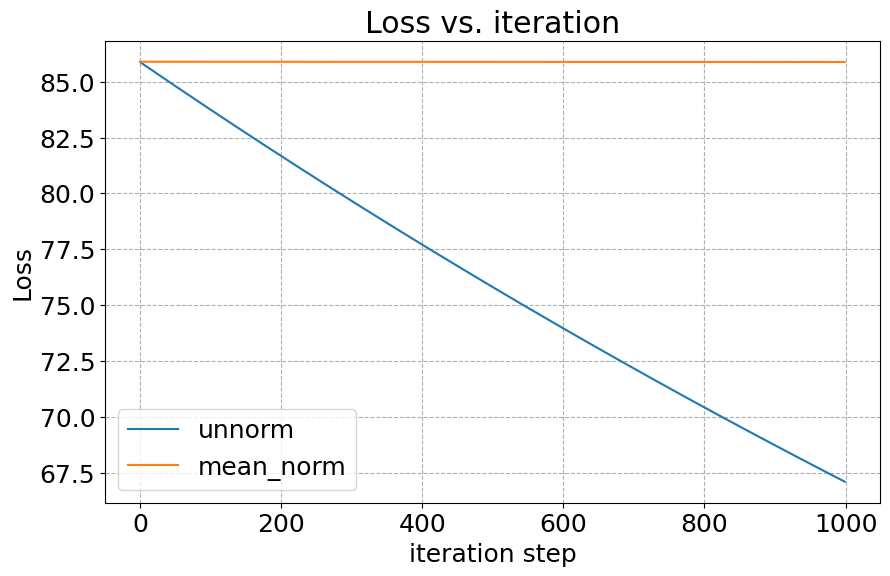

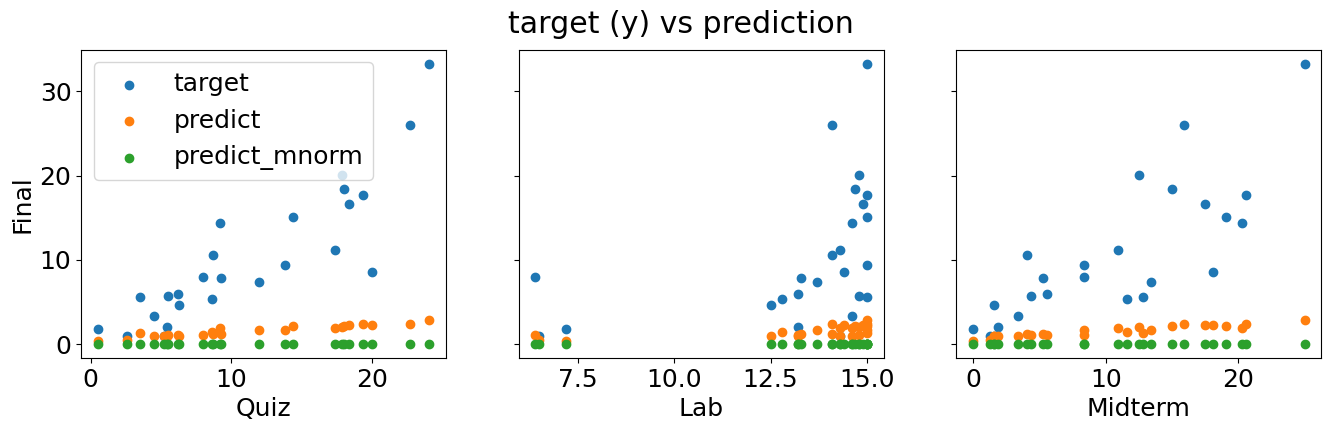

In [30]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# TODO: hyperparameter for training with gradient descent
alpha = 1e-7 # YOUR CODE HERE
iterations = 1000 # YOUR CODE HERE

# run gradient descent 
w_mnorm, b_mnorm, J_mnorm = gradient_descent(X_mnorm, y, initial_w, initial_b,
                                          alpha, iterations)
print(f"b,w found by gradient descent: {b_mnorm:0.2f},{w_mnorm} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist, label='unnorm')
ax.plot(J_mnorm, label='mean_norm')
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.legend()
plt.show()
plt.close('all')

# Visualize prediction
m = X_mnorm.shape[0]
y_pred_mnorm = np.zeros(m)
for i in range(m):
    y_pred_mnorm[i] = predict(X_mnorm[i], w_mnorm, b_mnorm)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
    ax[i].scatter(X[:,i], y_pred_mnorm, label = 'predict_mnorm')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) vs prediction")
plt.show()
plt.close('all')

# Exercise: Which feature scaling works better?

Please explain in the text cell below.

YOUR ANSWER HERE

# Polynomial Features

Typical linear regression provides the following equation for prediction:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b   \tag{11} $$ 

The hand-engineering polynomial features enhances the linear regression model to be able to fit the non-linear patterns. The following is an example of transforming the multiple feature linear regression into a quadratic form:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_0^{2} + w_2x_1 + w_3x_1^{2} + ... + b \tag{12}$$

This can be done with the [np.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) function as follows:

```
X_poly = np.c_[X, X**2]
```

In [45]:
# TODO: Added engineered feature using polynomial equations
# Hint: you can use `np.c_[X, X**2]` to engineer X_squared features in addition to X
#       try not to include too much polynomial features --> lead to overfitting
X_poly = np.c_[X, X**2, X**3]# YOUR CODE HERE
#X_poly = np.c_[X, X**2]

# Do not forget to apply feature scaling as the polynomial features would amplify the effect of difference in feature values
# TODO: apply feature scaling of your choice
#X_poly_norm = np.c_[X, X** 1/2]# YOUR CODE HERE
X_poly_norm, X_poly_mu, X_poly_sigma = zscore_normalize_features(X_poly)
print(X_poly_norm, X_poly_mu, X_poly_sigma)

[[ 1.01  0.53  0.65  0.9   0.57  0.4   0.72  0.61  0.16]
 [-1.01  0.49 -0.97 -0.89  0.52 -0.88 -0.76  0.54 -0.72]
 [-0.38  0.3  -0.88 -0.57  0.26 -0.85 -0.61  0.22 -0.72]
 [-1.16  0.65  0.34 -0.94  0.74  0.04 -0.77  0.82 -0.18]
 [ 0.11  0.14  0.43 -0.16  0.06  0.13 -0.34 -0.03 -0.1 ]
 [ 1.31  0.42  1.09  1.35  0.42  1.02  1.28  0.41  0.83]
 [-0.49 -2.71 -0.27 -0.63 -2.6  -0.52 -0.65 -2.47 -0.58]
 [-0.86  0.57 -0.83 -0.83  0.63 -0.83 -0.74  0.68 -0.71]
 [-1.3  -2.67 -1.27 -0.97 -2.57 -0.94 -0.78 -2.46 -0.73]
 [-0.29 -0.01 -0.71 -0.5  -0.14 -0.78 -0.58 -0.26 -0.7 ]
 [-0.31  0.49  1.39 -0.51  0.52  1.53 -0.58  0.54  1.48]
 [ 0.92  0.38  0.08  0.77  0.36 -0.24  0.58  0.34 -0.39]
 [ 0.47  0.65  1.23  0.21  0.74  1.24 -0.01  0.82  1.11]
 [-0.88 -0.05 -1.18 -0.84 -0.18 -0.93 -0.74 -0.32 -0.73]
 [-1.61 -2.4  -1.45 -1.01 -2.4  -0.95 -0.78 -2.35 -0.74]
 [-0.74 -0.33 -1.23 -0.78 -0.51 -0.93 -0.72 -0.68 -0.73]
 [-0.76 -0.05 -0.67 -0.79 -0.18 -0.76 -0.72 -0.32 -0.69]
 [ 1.07  0.61  1.    0.98  0.68

Iteration    0: Cost    81.84   
Iteration  100: Cost    12.61   
Iteration  200: Cost     6.30   
Iteration  300: Cost     5.44   
Iteration  400: Cost     5.31   
Iteration  500: Cost     5.29   
Iteration  600: Cost     5.28   
Iteration  700: Cost     5.27   
Iteration  800: Cost     5.26   
Iteration  900: Cost     5.26   
b,w found by gradient descent: 10.41,[ 1.53 -0.21  0.5   1.57  0.08  0.47  2.21  0.37  1.34] 


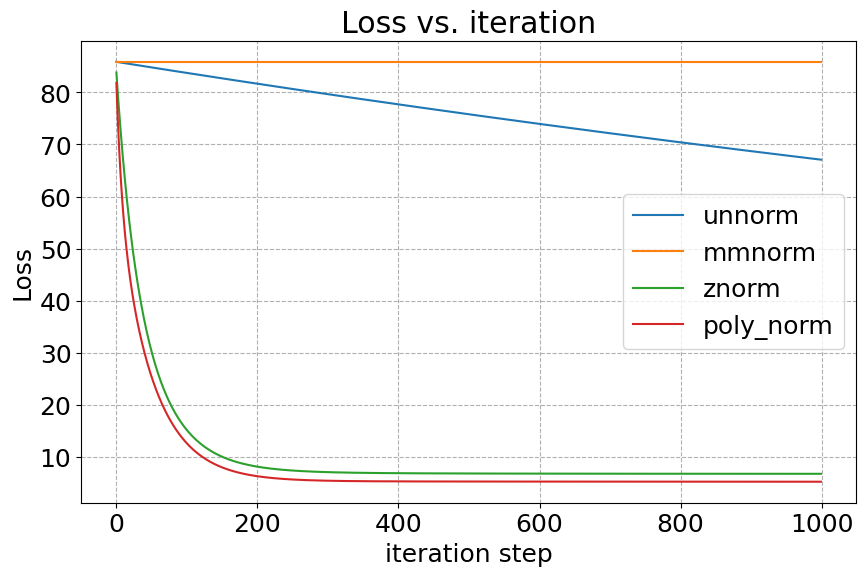

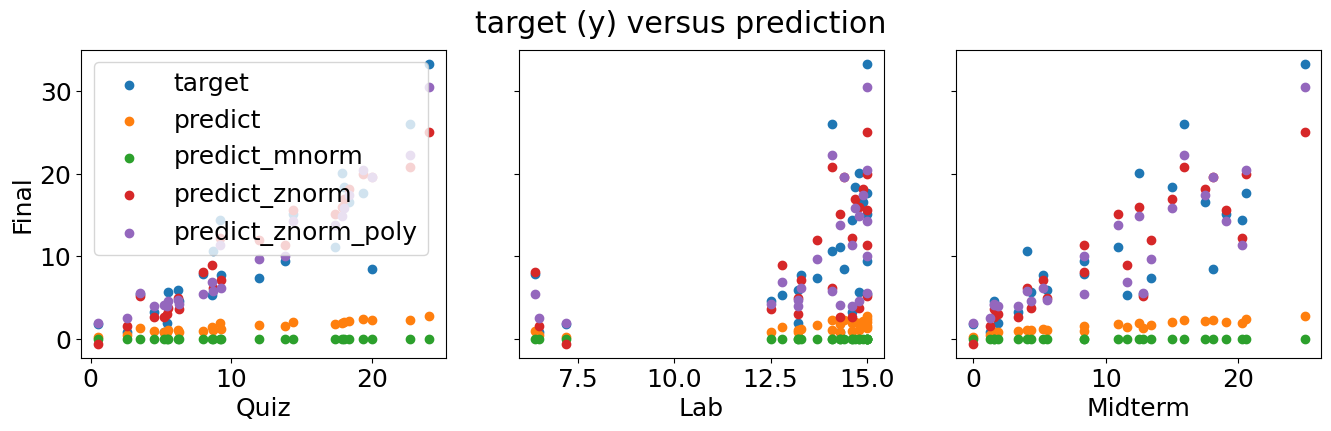

In [46]:
# TODO: initialize parameters
# Hint: the number of weights (w) will change according to the number of features after additiong the polynomial features
#       the number of bias remains the same
n_features = X_poly_norm.shape[1] 
initial_w = np.zeros(n_features) # YOUR CODE HERE
initial_b = 0 # YOUR CODE HERE

# TODO: hyperparameter for training with gradient descent
alpha = 1.0e-2 # YOUR CODE HERE
iterations = 1000 # YOUR CODE HERE

# run gradient descent 
w_poly, b_poly, J_poly = gradient_descent(X_poly_norm, y, initial_w, initial_b,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_poly:0.2f},{w_poly} ")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist, label='unnorm')
ax.plot(J_mnorm, label='mmnorm')
ax.plot(J_znorm, label='znorm')
ax.plot(J_poly, label='poly_norm')
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.legend()
plt.show()
plt.close('all')

# Visualize prediction
m = X_poly_norm.shape[0]
y_pred_poly = np.zeros(m)
for i in range(m):
    y_pred_poly[i] = predict(X_poly_norm[i], w_poly, b_poly)

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:,i], y_pred, label = 'predict')
    ax[i].scatter(X[:,i], y_pred_mnorm, label = 'predict_mnorm')
    ax[i].scatter(X[:,i], y_pred_znorm, label = 'predict_znorm')
    ax[i].scatter(X[:,i], y_pred_poly, label = 'predict_znorm_poly')
ax[0].set_ylabel("Final")
ax[0].legend()
fig.suptitle("target (y) versus prediction")
plt.show()
plt.close('all')

## Exercise: Predict a new student

In [48]:
#new_x = np.array([[13.2, 10.8, 14.5]])  # shape (1, 3)

# Hint: You may find np.c_ function useful
#new_x_poly = alpha * X_poly # YOUR CODE HERE
#new_x_poly = np.c_[new_x, new_x**2]
#new_x_poly = np.c_[new_x, new_x**2, new_x**3]
#print(f"{new_x_poly=}")

# Hint: You MUST use to the computed mu and sigma from the dataset for normalization
  # YOUR CODE HERE
#new_x_poly_norm = np.c_[new_x, new_x** 1/2]
#new_x_poly_norm = (new_x - mu) / sigma
#new_x_poly_norm = (new_x_poly - X_poly_mu) / X_poly_sigma


#print(f"{new_x_poly_norm=}")
# Hint: You may use `predict` function here
#y_pred_new = np.zeros(new_x_poly_norm.shape[0])
#for i in range(new_x_poly_norm.shape[0]):
   #y_pred_new = predict(new_x_poly[i], w_poly, b_poly)
#   y_pred_new[i] = predict(new_x_poly_norm[i], w_poly, b_poly)
#print(f"{y_pred_new=}")

new_x = np.array([[13.2, 10.8, 14.5]])  # shape (1, 3)

# Hint: You may find np.c_ function useful
# new_x_poly = # YOUR CODE HERE
#new_x_poly = np.c_[new_x, new_x**2]
new_x_poly = np.c_[new_x, new_x**2, new_x**3]
print(f"{new_x_poly=}")

# Hint: You MUST use to the computed mu and sigma from the dataset for normalization
# new_x_poly_norm = # YOUR CODE HERE
new_x_poly_norm = (new_x_poly - X_poly_mu) / X_poly_sigma
print(f"{new_x_poly_norm=}")

# Hint: You may use `predict` function here
y_pred_new = np.zeros(new_x_poly_norm.shape[0])
for i in range(new_x_poly_norm.shape[0]):
    # y_pred_new[i] = # YOUR CODE HERE
    y_pred_new[i] = predict(new_x_poly_norm[i], w_poly, b_poly)
print(f"{y_pred_new=}")

new_x_poly=array([[  13.2 ,   10.8 ,   14.5 ,  174.24,  116.64,  210.25, 2299.97,
        1259.71, 3048.62]])
new_x_poly_norm=array([[ 0.29, -0.99,  0.58,  0.02, -1.23,  0.31, -0.19, -1.42,  0.07]])
y_pred_new=array([10.57])


Expected output:
```
new_x_poly=array([[  13.2 ,   10.8 ,   14.5 ,  174.24,  116.64,  210.25, 2299.97,
        1259.71, 3048.62]])
new_x_poly_norm=array([[ 0.29, -0.99,  0.58,  0.02, -1.23,  0.31, -0.19, -1.42,  0.07]])
y_pred_new=10.57482779851474
```

# Exercise: Do the polynomial features help?

Please explain in the text cell below.

YOUR ANSWER HERE